# <center>Projet ADEME</center>

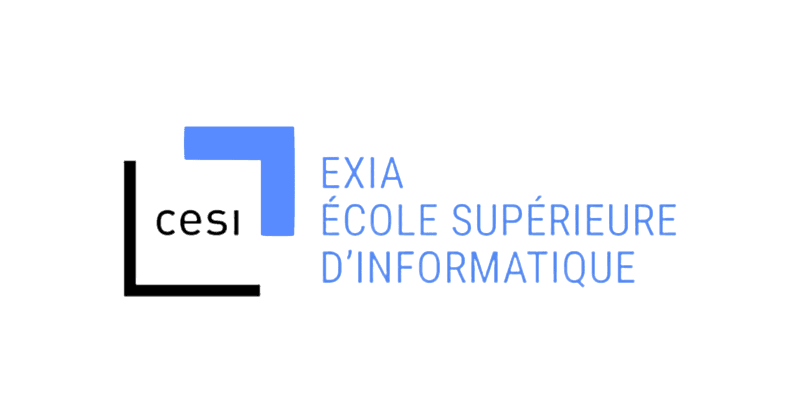


### Membres :
    ZAMOUCHE Nadir
    MESSAOUI Afnane
    GUELLATI Mohamed
    ALI ZOUAOUI Zakaria

# Rappel du Contexte :

L'ADEME a lancé un appel à manifestation d'intérêt pour développer des solutions de mobilité adaptées aux territoires.
Notre entreprise, CesiCDP, spécialisée dans la Mobilité Multimodale Intelligente, souhaite répondre à cet appel en se 
concentrant sur la gestion de tournées de livraison. L'objectif est de minimiser la durée totale de la tournée 
en tenant compte du trafic prévu sur chaque axe. Nous faisons partie de l'équipe chargée de développer une méthode de 
recherche opérationnelle pour résoudre ce problème. Nous envisageons d'ajouter des contraintes supplémentaires pour rendre
l'étude plus réaliste et attrayante pour l'ADEME, bien que cela puisse compliquer davantage sa résolution.

# Problematique :

Quel est le circuit optimal permettant à différents livreurs d'effectuer des livraisons dans un sous-ensemble de villes tout
en minimisant la durée totale de la tournée ?

# Complexité :

Dans un graphe non orienté G=(U,E) représentant un ensemble de clients (villes/sommets) U et les distances entre les clients
E, nous abordons deux problèmes distincts :

Problème de décision : Existe-t-il, au sein d'un sous-ensemble de villes données, des circuits optimaux permettant à
différents livreurs de livrer toutes les destinations dans un laps de temps minimal ? La réponse à cette question est
Booléenne (True, False).

problème. Cette mesure est basée sur la complexité des algorithmes qui peuvent résoudre le problème.
Notre problème s’apparente très clairement à une variable du problème du voyageur de commerce (connu sous le nom de TSP). Ce problème est NP-Complet, ce qui signifie que c’est un problème pour lequel il n'existe pas d'algorithme connu qui puisse trouver une solution optimale en un temps polynomial.

Un problème est NP-Complet s’il est NP et NP-Difficile.

L'ajout de contraintes de K camions pour réduire le temps de livraison et le variation de temps entre chaque arrete rendent le problème encore plus difficile. Il est bien connu que le VRP avec les contraintes citées est NP-Difficile. En effet, même sans ces dernières, le simple fait de déterminer si une tournée satisfaisant toutes les contraintes qu'on a implementé, c'est un problème NP-complet (Desrochers et al., 1988).

La démonstration qu'un problème est NP-difficile ou NP-complet nécessite généralement de prouver deux choses principales :

•	Le problème est dans NP : Cela signifie qu'une solution donnée au problème peut être vérifiée comme correcte ou non en temps polynomial. Dans notre cas, si nous avons une tournée proposée, nous pouvons vérifier en temps polynomial si elle visite chaque ville exactement une fois, commence et se termine à la ville de départ, et respecte toutes les fenêtres de livraison.

•	Le problème est NP-hard : Cela signifie que chaque problème dans NP peut être réduit en temps polynomial à notre problème. C'est généralement prouvé en montrant une réduction d'un problème connu pour être NP-difficile à notre problème.
Pour notre cas, le problème de la tournée de véhicules avec les contraintes choisis peut être réduit au problème de la tournée de véhicules (VRP) qui est déjà connu pour être NP-difficile.
En conclusion, on a donc un problème dans NP, et en plus de cela NP-Difficile, donc notre problème est NP-Complet.


# Données

On a généré un ensemble de villes partant de notre problème de base qui a déjà , avec cet ensemble de ville, on a construit notre matrice d'adjacence, qui permet de calculer la distance entre deux positions géographiques exprimées. S'il n'existe aucune relation entre deux villes, la valeur de la distance sera de 0.

# Contraintes :

Voici une liste (non exhaustive) de contraintes qui pourraient être intégrées au périmètre de votre étude. Pour certaines,
des versions avancées sont aussi proposées. L’implémentation d’une contrainte et de l’une de ses versions avancées vaut 
l’implémentation de deux contraintes.

Fenêtre de temps de livraison pour chaque objet

Interdiction de livrer hors de la fenêtre

Possibilité d'attendre sur place l'ouverture de la fenêtre temporelle

k camions disponibles simultanément pour effectuer les livraisons. Le calcul de la tournée devra inclure l’affectation des
objets (et donc des points de livraison) aux différents camions disponibles, et minimiser non plus le temps total, mais la
date de retour du dernier camion à la base.

Capacité des camions (2 ou 3 dimensions) et encombrement des objets

Certains objets ne peuvent être livrés que par certains camions

Chaque objet a un point de collecte spécifique

Le temps de parcours d’une arête varie au cours du temps (ce qui revient à faire varier sa longueur), pour représenter la 
variation du trafic

 

Ces contraintes peuvent être réparties en deux catégories :

Les contraintes ne modifiant pas l’espace des solutions, uniquement leurs valeurs. Par exemple, la prise en compte de 
fenêtres de temps avec attente (si le camion est en avance). Dans le cas d’une méthode à voisinage, les voisins d’une 
solution ne seront pas modifiés par l’intégration de cette contrainte, seuls les coûts seront différents.

Les contraintes modifiant l’espace des solutions. Par exemple, certains objets nécessitant un camion d’un type précis pour
être livrés. Ajouter cette contrainte va rendre certaines solutions invalides, et donc restreindre l’espace de solutions.

### Contraintes Choisies :

Le graphe G = (V, E) est connexe, ce qui signifie qu'il est possible de se déplacer d'un sommet à n'importe quel autre sommet du graphe en suivant les arêtes du graphe. Pour résoudre le problème, nous avons défini les constantes suivantes :

$n$ représente le nombre de clients (ou sommets).
$m$ représente le nombre de véhicules.
$q_i$ correspond à la demande du client $i$.
$c_{ij}$ est le coût de l'arête entre les sommets $i$ et $j$, qui peut représenter la distance ou le temps de trajet.
Les variables de décision du problème sont les $x_{ijk}$ mentionnés ci-dessous :

The decision variables of the problem are the $x_{ijk}$ mentioned above:

   \begin{array}{r c l}
      1  & si & (i, j) & is&travelled&by&the&vehicle&k&, \\
      0   & sinon       
   \end{array}

Et en tant que problème d'optimisation, il s'écrit :


\begin{equation*}
Minimize  \sum_{i=1}^n \sum_{j=1}^n c_ij \sum_{k=1}^m x_{ijk}
\quad\quad\quad \left(1\right)
\end{equation*}
 

Contraintes :

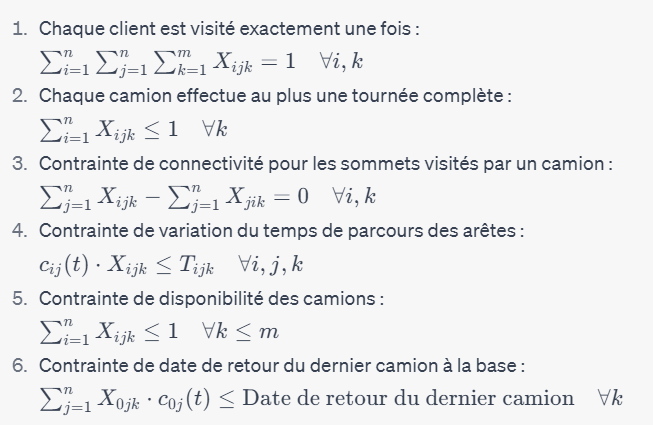


Ces contraintes garantissent que chaque ville est visitée, que les véhicules effectuent au plus une tournée complète, les camions soient disponibles et finalement de la variation du temps de parcours des arêtes  

# Complexité des problèmes de décision et d'optimisation

Démontrer que le problème est NP complet :

Nous démontrons ici la réduction du problème du Voyageur de Commerce au problème de la résolution du Problème de Tournées de
Véhicules (VRP). Si nous pouvions résoudre le Voyageur de Commerce en temps polynomial, nous pourrions également utiliser 
cet algorithme pour résoudre le VRP. Étant donné que le Voyageur de Commerce est NP-complet et que le VRP est dérivé de ce 
dernier, nous en concluons que le VRP est également NP-complet.

L'algorithme de vérification du cycle du projet doit s'assurer que le cycle est un cycle hamiltonien avec un poids inférieur
à une valeur k donnée. Il se décompose en quatre étapes :

•	Vérifier si le cycle du projet est bien un cycle en vérifiant si le sommet de départ et le sommet final du cycle sont
identiques.
•	Parcourir le cycle du projet pour vérifier que chaque sommet du projet apparaît au minimum une fois et au maximum une 
fois.
•	Parcourir le cycle du projet pour additionner les poids de chaque arête du cycle.
•	Vérifier que le poids total du cycle du projet est inférieur à k.
La complexité de cet algorithme peut être déterminée comme suit :

•	La première étape a une complexité de O(1) car il suffit de comparer les deux sommets en O(1).
•	La deuxième étape a une complexité de O(n) où n est le nombre de sommets du graphe du projet. Il faut parcourir chaque 
sommet et vérifier sa présence dans le cycle.
•	La troisième étape a également une complexité de O(n) car il faut parcourir chaque arête du cycle et additionner les 
poids.
•	La dernière étape a une complexité de O(1) car il suffit de comparer le poids total avec k en O(1).
Chaque étape a une complexité polynomiale, ce qui fait que l'algorithme de vérification est lui-même polynomial.


Démontrer que le problème est NP difficile :

Nous appliquons une réduction à partir du problème du Voyageur de Commerce pour démontrer que la résolution du problème du
Voyageur de Commerce en temps polynomial permettrait de résoudre également le problème vrp. Étant donné que le problème du
Voyageur de Commerce est NP-Complet et que le problème vrp en découle, avec l'ajout de contraintes telles que la période de
tournée et le nombre d'objets affectés à chaque camion, nous concluons que le problème vrp est NP-Difficile.

L'instance Ihamiltonien du problème du cycle hamiltonien est représentée par le graphe G=(V, E). L'instance Iprojet du
problème posé par le projet ADEME est également représentée par le même graphe G.

Si un cycle hamiltonien Cprojet de poids inférieur à un nombre k donné existe dans G, cela signifie qu'il existe au moins un
cycle hamiltonien, à savoir Cprojet, dans G.

Si aucun cycle hamiltonien n'existe dans G, il sera impossible de trouver un cycle hamiltonien de poids inférieur à k. Si un
algorithme capable de résoudre le problème posé par le projet ADEME en temps polynomial existait, nous pourrions l'utiliser
pour résoudre le problème du cycle hamiltonien en temps polynomial. Par conséquent, nous concluons que le problème posé par
le projet ADEME est NP-difficile, puisqu'il est au moins aussi difficile que le problème du cycle hamiltonien.


# Conclusion

Le problème de décision du projet ADEME est classé comme NP-complet, ce qui signifie qu'il est extrêmement difficile à 
résoudre de manière exacte. Le problème d'optimisation associé est également très complexe, nécessitant l'utilisation 
d'approches de résolution approximatives pour traiter de grandes instances.

### Méthode de résolution

Notre méthode de résolution consiste à sélectionner un sous-graphe contenant uniquement les clients à livrer pour notre
camion, en prenant en compte sa capacité. Ensuite, nous transformons ce sous-graphe en un graphe complet en utilisant le cas
métrique pour évaluer les distances entre les clients.

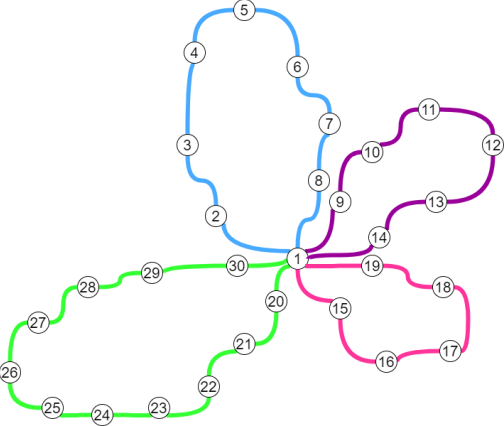


# Modélisation du problème

Pour modéliser un problème simple avec 10 villes et 5 camions, nous utilisons un DataFrame pour attribuer des coordonnées à
n points, où les coordonnées sont choisies entre 0 et 10 fois le nombre de villes. Chaque point est également associé à un 
produit, et le DataFrame nous permet de gérer les opérations de base sur les lignes et les colonnes.

Afin de garantir qu'un produit est toujours attribué à une ville, même de manière aléatoire, nous attribuons par défaut une
ville aléatoire à chaque produit.

Ensuite, nous créons des sous-graphes en fonction des données du DataFrame, ce qui nous donne une liste de graphes 
correspondant à chaque sous-problème.

Enfin, nous travaillons avec les résultats des graphes, en déterminant les matrices d'adjacence pour chaque sous-graphe.
Ces matrices nous permettent de représenter le problème sous forme de graphe et de poursuivre les étapes de résolution.

Dans notre problème, nous cherchons à optimiser les tournées de livraison pour plusieurs camions dans une zone géographique
donnée. Pour représenter ce problème, nous utilisons un graphe non orienté pondéré, où les sommets du graphe représentent
les villes à livrer, les arêtes représentent les routes entre les villes, et les poids sur les arêtes représentent les 
distances entre les villes. L'objectif est de trouver des chemins indépendants et optimaux pour chaque camion afin 
d'effectuer les livraisons de manière efficace.

In [1]:
import numpy as np
import random

num_vertices = 1000

# Create an empty adjacency matrix
adj_matrix = np.zeros((num_vertices, num_vertices), dtype=int)

# Fill the adjacency matrix with random values
for i in range(num_vertices):
    for j in range(i+1, num_vertices):
        # Generate a random time between vertices i and j
        time = random.randint(1, 100)  # Modify the range (1, 100) as needed

        # Assign the time to the corresponding position in the matrix
        adj_matrix[i][j] = time
        adj_matrix[j][i] = time

# Display the adjacency matrix
print(adj_matrix)

# Save the adjacency matrix to a text file
with open("adjacency_matrix.txt", "w") as file:
    for row in adj_matrix:
        file.write(" ".join(str(x) for x in row) + "\n")

[[ 0 56 87 ... 88 65 51]
 [56  0 78 ... 29  8 91]
 [87 78  0 ... 19  7 30]
 ...
 [88 29 19 ...  0 34 30]
 [65  8  7 ... 34  0 38]
 [51 91 30 ... 30 38  0]]



# Les Métaheuristiques
Le problème est considéré comme étant NP-complet, ce qui implique qu'il est très difficile à résoudre, surtout pour un grand nombre de villes. En effet, le nombre de chemins possibles à traverser toutes les villes augmente considérablement à mesure que le nombre de villes augmente, ce qui rend la recherche exhaustive de la solution impossible pour un grand nombre de villes.

Cependant, l'utilisation de métaheuristiques permet d'adapter le problème à de grandes instances, avec un nombre de villes plus important, en explorant de manière intelligente l'espace des solutions possibles, tout en garantissant la qualité de la solution trouvée dans un temps raisonnable. En étudiant leurs fonctionnements et en les utilisant au sein de différents algorithmes, nous seront en mesure de dégager l’algorithme le plus efficace pour la résolution de notre problème.

# Algorithme génétique
Étant donné que le problème que nous cherchons à résoudre appartient à la classe NP, il n'est pas possible de trouver
rapidement une solution optimale. Cependant, les métaheuristiques, telles que les algorithmes génétiques, offrent une
approche itérative permettant d'obtenir rapidement une solution de haute qualité. Les algorithmes génétiques sont 
particulièrement intéressants car ils combinent des principes inspirés de l'évolution biologique pour explorer efficacement
l'espace des solutions. Cependant, il est important de noter qu'ils ne garantissent pas de trouver l'optimum global, mais 
plutôt une solution satisfaisante dans un temps raisonnable.

L'algorithme génétique est un algorithme itératif qui s'inspire du processus d'évolution biologique pour résoudre des 
problèmes d'optimisation. Voici comment il fonctionne généralement :

Initialisation : Au début de l'algorithme, une population initiale de solutions potentielles est générée de manière 
     aléatoire. Chaque solution est représentée sous forme de "chromosome" qui code les caractéristiques de la solution.

Évaluation : Chaque solution de la population est évaluée en utilisant une fonction d'évaluation ou une fonction objectif. 
    Cette fonction mesure la qualité ou la performance de chaque solution par rapport à l'objectif du problème 
    d'optimisation.

Sélection : Les solutions les mieux adaptées, c'est-à-dire celles ayant obtenu les meilleures évaluations, sont 
    sélectionnées pour se reproduire. Cette sélection se fait généralement de manière probabiliste, où les solutions les 
    plus performantes ont une plus grande chance d'être sélectionnées.

Croisement (crossover) : Les solutions sélectionnées sont combinées en utilisant des opérations de croisement. Le croisement
    implique l'échange de parties des chromosomes des solutions parentales pour créer de nouvelles solutions 
    (les "enfants"). Cela permet de combiner les caractéristiques des solutions parentales dans l'espoir de produire des
    solutions de meilleure qualité.

Mutation : Après le croisement, une petite proportion de la population est soumise à une mutation aléatoire. La mutation 
    modifie légèrement les gènes des solutions, introduisant ainsi une exploration plus poussée de l'espace des solutions. 
    La mutation permet d'introduire de nouvelles caractéristiques ou de modifier celles existantes.

Remplacement : Les nouvelles solutions (enfants) issues du croisement et de la mutation remplacent une partie de l'ancienne 
    population. Cela permet d'introduire de nouvelles caractéristiques génétiques et de favoriser l'amélioration de la 
    population au fil des générations.

Répétition : Les étapes de sélection, croisement, mutation et remplacement sont répétées pendant plusieurs générations, 
    permettant à la population d'évoluer et de converger vers des solutions de plus en plus optimales.

Convergence et condition d'arrêt : L'algorithme continue à évoluer jusqu'à atteindre une condition d'arrêt prédéfinie, 
telle qu'un nombre maximum d'itérations, une amélioration suffisamment faible de la qualité des solutions, ou l'obtention 
d'une solution satisfaisante.                                               

# Algorithme des colonies de fourmis (ACO)

L'algorithme des colonies de fourmis (ACO) est un algorithme métaheuristique basé sur la population, inspiré du comportement de recherche de nourriture des fourmis. Il est couramment utilisé pour résoudre des problèmes d'optimisation combinatoire tels que le Problème du Voyageur de Commerce (TSP) ou le Problème de Routage de Véhicules (VRP). Voici un aperçu global de l'algorithme des colonies de fourmis :

Initialisation : Créer une population de fourmis artificielles et initialiser les pistes de phéromones sur le graphe du problème.

Construction de solutions par les fourmis : Chaque fourmi construit de manière probabiliste une solution en sélectionnant itérativement des arêtes en fonction des niveaux de phéromones et des informations heuristiques.

Mise à jour locale des phéromones : Après que chaque fourmi ait terminé la construction d'une solution, elle met à jour les pistes de phéromones sur les arêtes empruntées, en déposant des phéromones en fonction de la qualité de sa solution.

Mise à jour globale des phéromones : Une fois que toutes les fourmis ont construit leurs solutions, les pistes de phéromones sont mises à jour globalement pour évaporer les anciennes phéromones et renforcer les pistes des bonnes solutions.

Itération : Les étapes 2 à 4 sont répétées un nombre spécifié de fois ou jusqu'à ce qu'un critère d'arrêt soit atteint.

Sélection de la meilleure solution : À la fin de l'algorithme, la meilleure solution trouvée par les fourmis est sélectionnée comme résultat final.

# Comparaison

Dans le cadre de votre projet de gestion de tournées de livraison, l'algorithme génétique (AG) et l'algorithme des colonies de fourmis (ACO) sont tous les deux capables de résoudre le problème. Voici une comparaison entre ces deux approches dans notre contexte :

Algorithme génétique (AG) :

Avantages :

Adaptabilité : L'AG est capable de gérer des problèmes complexes avec des contraintes multiples, ce qui est bénéfique pour prendre en compte les diverses contraintes de votre projet, telles que le trafic prévu.
Exploration de l'espace de recherche : L'AG explore efficacement l'espace de recherche en utilisant des opérations génétiques telles que la sélection, le croisement et la mutation, ce qui permet de trouver des solutions potentiellement optimales.
Adaptation à l'évolution : L'AG est capable de s'adapter aux changements dans les conditions de trafic ou les contraintes en ajustant les paramètres génétiques au fil du temps.
Limitations :

Temps de calcul : L'AG peut nécessiter des ressources de calcul significatives, en particulier pour des problèmes complexes avec un grand nombre de tournées de livraison et de contraintes supplémentaires.
Risque de convergence prématurée : L'AG peut converger vers des solutions locales optimales et avoir du mal à explorer l'espace de recherche de manière exhaustive, à moins d'utiliser des techniques spécifiques pour encourager l'exploration.

Algorithme des colonies de fourmis (ACO) :

Avantages :

Exploitation des informations locales : L'ACO utilise les pistes de phéromones pour guider les fourmis vers des solutions prometteuses, ce qui peut être utile pour prendre en compte les informations locales telles que le trafic prévu sur chaque axe de livraison.
Adaptation dynamique : L'ACO peut s'adapter aux changements de trafic en ajustant les niveaux de phéromones en temps réel, ce qui permet de réagir aux variations de conditions routières.
Capacité à trouver des solutions proches de l'optimal : L'ACO est connu pour sa capacité à trouver des solutions de bonne qualité et proches de l'optimal dans des problèmes complexes de routage.
Limitations :

Sensibilité aux paramètres : L'ACO peut être sensible au réglage des paramètres tels que la quantité de phéromones déposées et les poids heuristiques, ce qui peut nécessiter une phase d'ajustement fine pour obtenir de bons résultats.
Complexité de l'implémentation : L'ACO peut nécessiter une mise en œuvre plus complexe que l'AG, notamment pour gérer efficacement la mise à jour des niveaux de phéromones et la construction des solutions par les fourmis.



#  Solving the problem

### A. Create the data
The data is randomly generated with an algorithm  


In [4]:
import numpy as np
import random

num_vertices = 1000

# Create an empty adjacency matrix
adj_matrix = np.zeros((num_vertices, num_vertices), dtype=int)

# Fill the adjacency matrix with random values
for i in range(num_vertices):
    for j in range(i+1, num_vertices):
        # Generate a random time between vertices i and j
        time = random.randint(1, 100)  # Modify the range (1, 100) as needed

        # Assign the time to the corresponding position in the matrix
        adj_matrix[i][j] = time
        adj_matrix[j][i] = time

# Display the adjacency matrix
print(adj_matrix)

# Save the adjacency matrix to a text file
with open("adjacency_matrix.txt", "w") as file:
    for row in adj_matrix:
        file.write(" ".join(str(x) for x in row) + "\n")

[[ 0 60 61 ... 68 18 14]
 [60  0 94 ... 54 28 42]
 [61 94  0 ... 61 69 55]
 ...
 [68 54 61 ...  0  6  1]
 [18 28 69 ...  6  0  2]
 [14 42 55 ...  1  2  0]]


### B. Solving the VRP based problem with GA
The complete program for the capacitated vehicle routing problem with GA is shown below :

Truck 1:
Path: 11 -> 21 -> 17 -> 19 -> 40 -> 11.
Time required: 9 hours 40 minutes.

Truck 2:
Path: 38 -> 35 -> 28 -> 34 -> 30 -> 38.
Time required: 7 hours 17 minutes.

Truck 3:
Path: 50 -> 37 -> 14 -> 3 -> 48 -> 50.
Time required: 10 hours 5 minutes.

Truck 4:
Path: 45 -> 6 -> 47 -> 7 -> 22 -> 45.
Time required: 10 hours 13 minutes.

Truck 5:
Path: 10 -> 32 -> 44 -> 31 -> 24 -> 10.
Time required: 9 hours 27 minutes.

Truck 6:
Path: 33 -> 13 -> 0 -> 18 -> 25 -> 33.
Time required: 7 hours 20 minutes.

Truck 7:
Path: 42 -> 5 -> 2 -> 49 -> 43 -> 42.
Time required: 10 hours 7 minutes.

Truck 8:
Path: 39 -> 9 -> 20 -> 15 -> 27 -> 39.
Time required: 11 hours 32 minutes.

Truck 9:
Path: 1 -> 12 -> 16 -> 41 -> 26 -> 1.
Time required: 8 hours 17 minutes.

Truck 10:
Path: 36 -> 23 -> 29 -> 4 -> 8 -> 36.
Time required: 10 hours 3 minutes.



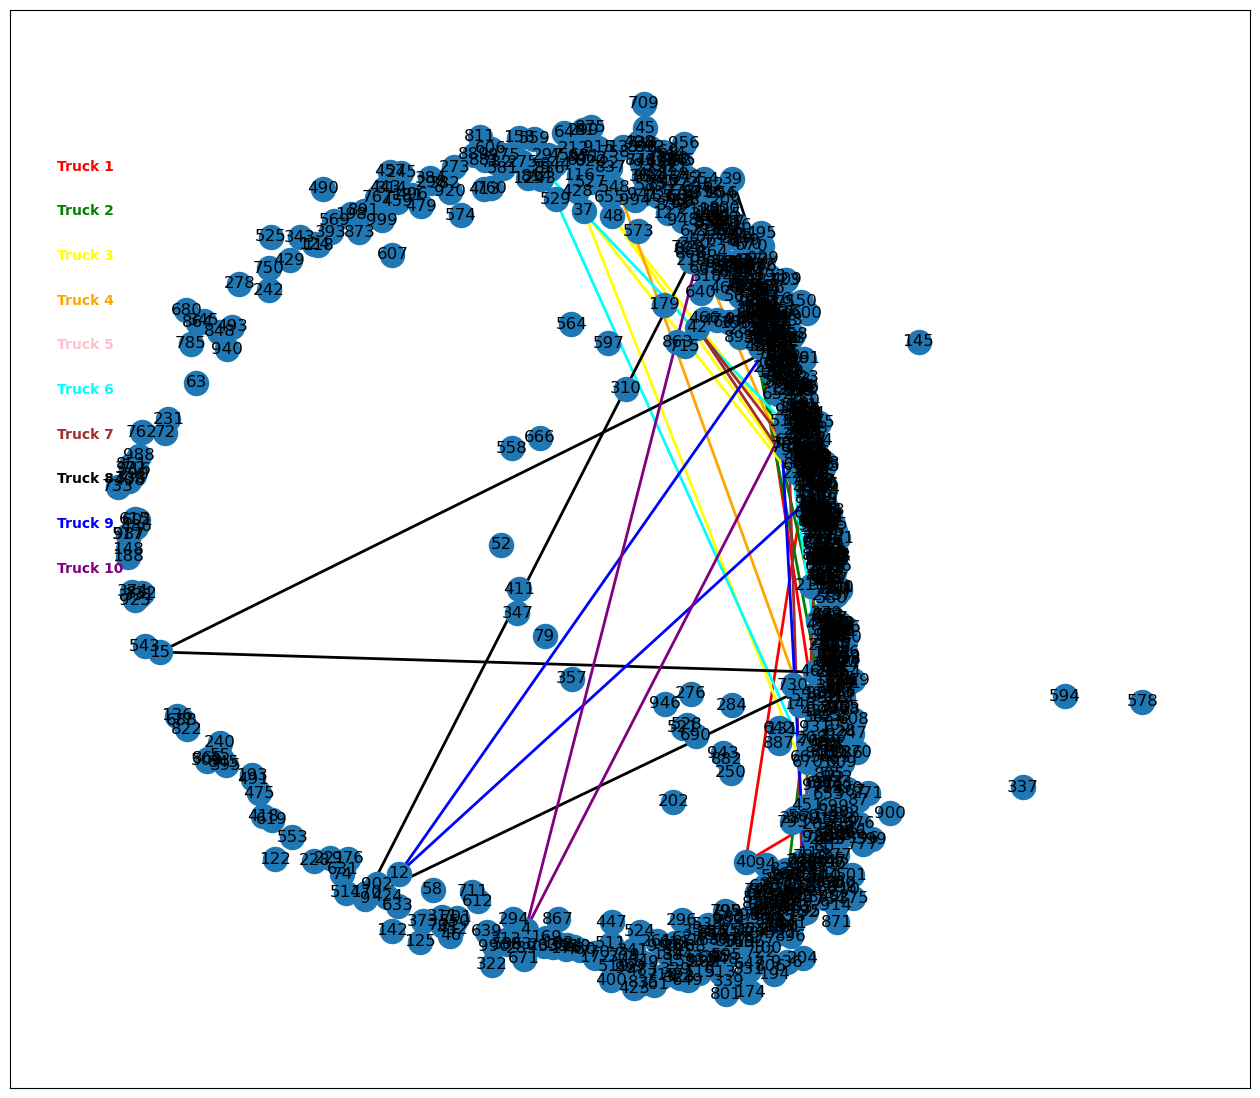

In [2]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Classe représentant un individu dans la population
class Individual:
    def __init__(self, sequence):
        self.sequence = sequence
        self.fitness = 0.0
    
    def calculate_fitness(self, graph):
        # Calcul de la fitness en fonction des contraintes
        # Par exemple, en calculant le coût total du chemin
        self.fitness = calculate_path_cost(graph, self.sequence)
    

# Fonction de calcul du coût total du chemin
def calculate_path_cost(graph, sequence):
    cost = 0.0
    # Calculer le coût en fonction des arêtes dans le graphe
    for i in range(len(sequence) - 1):
        source = sequence[i]
        target = sequence[i+1]
        random_multiplier = random.randint(1, 2)
        cost += graph[source][target]['cost'] * random_multiplier  # Use 'cost' from the graph instead of 'weight'
    return cost


# Fonction de génération de la population initiale
def generate_initial_population(graph, population_size):
    population = []
    nodes = list(graph.nodes)[:51]  # Restrict to vertices 0-50
    for _ in range(population_size):
        random.shuffle(nodes)
        individual = Individual(nodes.copy())
        individual.calculate_fitness(graph)
        population.append(individual)
    return population


# Fonction de sélection des parents par tournoi
def selection_tournament(population, tournament_size):
    parents = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        winner = max(tournament, key=lambda x: x.fitness)
        parents.append(winner)
    return parents


# Fonction de croisement (crossover) utilisant l'ordre partiel
def crossover(parent1, parent2):
    # Sélectionner une sous-séquence aléatoire du parent1
    start = random.randint(0, len(parent1.sequence) - 1)
    end = random.randint(start + 1, len(parent1.sequence))
    subsequence = parent1.sequence[start:end]
    
    # Créer un nouvel individu en insérant la sous-séquence du parent1 dans le même ordre
    child_sequence = parent2.sequence.copy()
    for node in subsequence:
        child_sequence.remove(node)
    
    child_sequence[start:start] = subsequence
    
    child = Individual(child_sequence)
    return child


# Fonction de mutation par inversion de sous-chemin
def mutation(individual):
    # Sélectionner deux positions aléatoires dans la séquence
    position1 = random.randint(0, len(individual.sequence) - 1)
    position2 = random.randint(0, len(individual.sequence) - 1)
    
    # Inverser le sous-chemin entre les deux positions
    start = min(position1, position2)
    end = max(position1, position2)
    individual.sequence[start:end+1] = reversed(individual.sequence[start:end+1])


# Fonction de remplacement d'une partie de la population
def replace_population(population, children):
    # Remplacer les individus les moins adaptés par les nouveaux enfants
    population.sort(key=lambda x: x.fitness, reverse=True)
    population[-len(children):] = children


# Fonction principale d'algorithme génétique
def genetic_algorithm(graph, population_size, num_generations, tournament_size, mutation_rate, num_trucks):
    population = generate_initial_population(graph, population_size)
    
    best_individual = None
    best_fitness = float('-inf')
    
    for generation in range(num_generations):
        parents = selection_tournament(population, tournament_size)
        children = []
        
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i+1]
            child = crossover(parent1, parent2)
            
            if random.random() < mutation_rate:
                mutation(child)
            
            child.calculate_fitness(graph)
            children.append(child)
        
        replace_population(population, children)
        
        # Mise à jour du meilleur individu
        current_best_individual = max(population, key=lambda x: x.fitness)
        if current_best_individual.fitness > best_fitness:
            best_individual = current_best_individual
            best_fitness = current_best_individual.fitness
    
    # Récupérer la meilleure solution
    best_path = best_individual.sequence
    
    # Ensure the solution has an Eulerian cycle
    if best_path[0] != best_path[-1]:
        best_path.append(best_path[0])
    
    return best_path


# Load the adjacency matrix from file
adj_matrix = np.loadtxt("adjacency_matrix.txt", dtype=int)

# Keep the adjacency matrix for all 1000 cities
adj_matrix = adj_matrix[:1000, :1000]

# Create a graph directly from the adjacency matrix
graph = nx.from_numpy_array(adj_matrix)

# Add random costs to the graph edges
for (source, target) in graph.edges():
    cost = adj_matrix[source][target]
    graph[source][target]['cost'] = cost

# Exemple d'utilisation avec le graphe à partir de la matrice d'adjacence
population_size = 50
num_generations = 100
tournament_size = 5
mutation_rate = 0.1
num_trucks = 10  # Number of trucks

# Generate unique colors for each truck
colors = ['red', 'green', 'yellow', 'orange', 'pink', 'cyan', 'brown', 'black', 'blue', 'purple']

# Appel de l'algorithme génétique
best_path = genetic_algorithm(graph, population_size, num_generations, tournament_size, mutation_rate, num_trucks)

# Split the best path into separate paths for each truck
truck_paths = [best_path[i*(len(best_path)//num_trucks):(i+1)*(len(best_path)//num_trucks)+1] for i in range(num_trucks)]

# Ensure the first and last node are the same across all trucks
for i in range(num_trucks):
    truck_paths[i][-1] = truck_paths[i][0]

# Calculate and display the path and total cost for each truck
for i, path in enumerate(truck_paths):
    # Calculate the total cost for the current truck
    truck_total_cost = calculate_path_cost(graph, path)
    
    # Convert the total cost from minutes to hours and minutes
    truck_total_hours = int(truck_total_cost // 60)
    truck_total_minutes = int(truck_total_cost % 60)
    
    # Display the path and total cost for the current truck
    print(f"Truck {i+1}:")
    path_str = " -> ".join(map(str, path))
    print(f"Path: {path_str}.")
    print(f"Time required: {truck_total_hours} hours {truck_total_minutes} minutes.")
    print()

# Draw the graph with all truck paths
plt.figure(figsize=(16, 14))
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_labels(graph, pos)

# Draw transparent edges
nx.draw_networkx_edges(graph, pos, edge_color='none', alpha=0.0)

# Draw truck paths with colors
for i, path in enumerate(truck_paths):
    truck_edges = [(path[j], path[j+1]) for j in range(len(path)-1)]
    edge_color = colors[i]
    nx.draw_networkx_edges(graph, pos, edgelist=truck_edges, edge_color=edge_color, width=2)

# Add labels for each truck outside the graph visualization
for i, path in enumerate(truck_paths):
    truck_label = f"Truck {i+1}"
    truck_color = colors[i]
    truck_label_x = -1  # Adjusted X coordinate for top left corner
    truck_label_y = 0.85 - i * 0.1  # Adjusted Y coordinate for top left corner
    plt.text(truck_label_x, truck_label_y, truck_label, color=truck_color, fontweight='bold')

# Show the graph visualization
plt.show()


# Statistiques 

## Boite à Moustaches

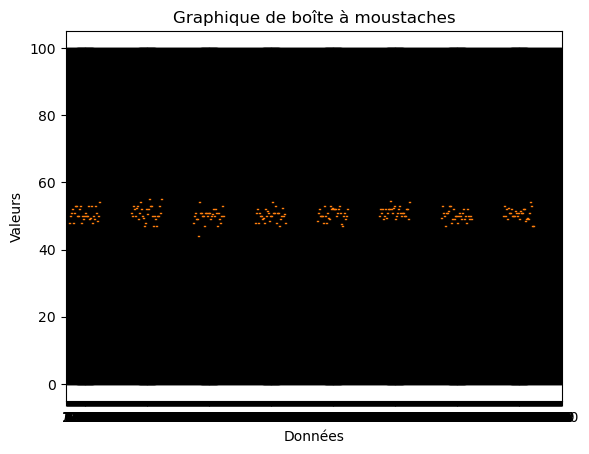

Moyenne : 50.511742
Écart-type : 28.899207153924408
Médiane : 51.0
Écart absolu médian : 25.0


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Lecture de la matrice depuis le fichier
matrix = np.loadtxt('adjacency_matrix.txt')

# Calcul des statistiques
mean = np.mean(matrix)
std_dev = np.std(matrix)
median = np.median(matrix)
mad = np.median(np.abs(matrix - median))

# Création du graphique
plt.boxplot(matrix)
plt.title("Graphique de boîte à moustaches")
plt.xlabel("Données")
plt.ylabel("Valeurs")
plt.show()

# Affichage des statistiques
print("Moyenne :", mean)
print("Écart-type :", std_dev)
print("Médiane :", median)
print("Écart absolu médian :", mad)

### Generations en fonction des Fitness et dU temps requis 

Generation 1:
Total time required: 73 hours 20 minutes.

Generation 2:
Total time required: 68 hours 26 minutes.

Generation 3:
Total time required: 73 hours 52 minutes.

Generation 4:
Total time required: 77 hours 30 minutes.

Generation 5:
Total time required: 84 hours 21 minutes.

Generation 6:
Total time required: 77 hours 7 minutes.

Generation 7:
Total time required: 85 hours 51 minutes.

Generation 8:
Total time required: 73 hours 22 minutes.

Generation 9:
Total time required: 88 hours 27 minutes.

Generation 10:
Total time required: 86 hours 15 minutes.

Generation 11:
Total time required: 85 hours 38 minutes.

Generation 12:
Total time required: 81 hours 37 minutes.

Generation 13:
Total time required: 81 hours 42 minutes.

Generation 14:
Total time required: 87 hours 23 minutes.

Generation 15:
Total time required: 81 hours 56 minutes.

Generation 16:
Total time required: 88 hours 36 minutes.

Generation 17:
Total time required: 78 hours 22 minutes.

Generation 18:
Total tim

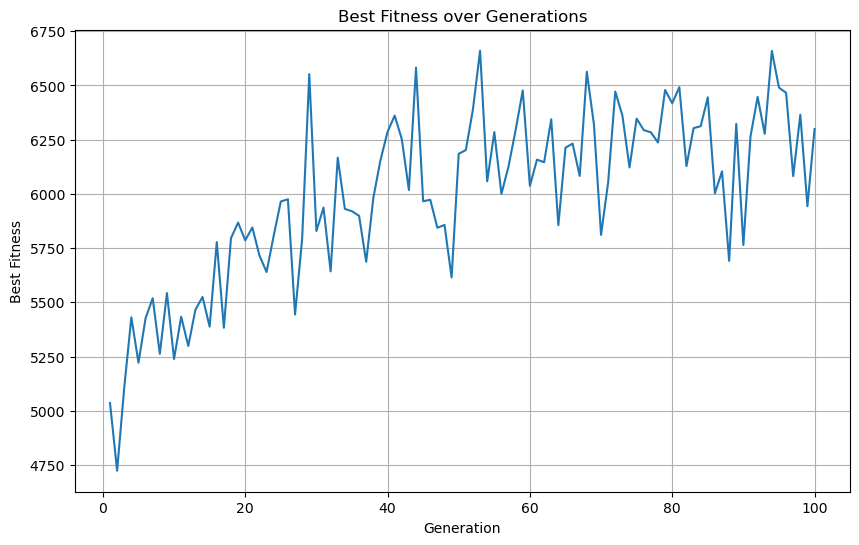

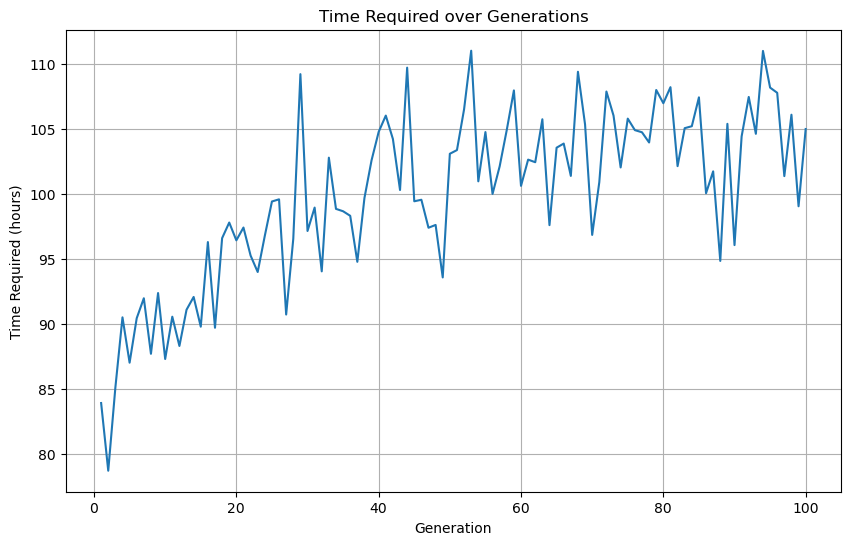

In [8]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Classe représentant un individu dans la population
class Individual:
    def __init__(self, sequence):
        self.sequence = sequence
        self.fitness = 0.0
    
    def calculate_fitness(self, graph):
        # Calcul de la fitness en fonction des contraintes
        # Par exemple, en calculant le coût total du chemin
        self.fitness = calculate_path_cost(graph, self.sequence)
    

# Fonction de calcul du coût total du chemin
def calculate_path_cost(graph, sequence):
    cost = 0.0
    # Calculer le coût en fonction des arêtes dans le graphe
    for i in range(len(sequence) - 1):
        source = sequence[i]
        target = sequence[i+1]
        random_multiplier = random.randint(1, 2)
        cost += graph[source][target]['cost'] * random_multiplier  # Use 'cost' from the graph instead of 'weight'
    return cost


# Fonction de génération de la population initiale
def generate_initial_population(graph, population_size):
    population = []
    nodes = list(graph.nodes)[:51]  # Restrict to vertices 0-50
    for _ in range(population_size):
        random.shuffle(nodes)
        individual = Individual(nodes.copy())
        individual.calculate_fitness(graph)
        population.append(individual)
    return population

# Fonction de sélection des parents par tournoi
def selection_tournament(population, tournament_size):
    parents = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        winner = max(tournament, key=lambda x: x.fitness)
        parents.append(winner)
    return parents


# Fonction de croisement (crossover) utilisant l'ordre partiel
def crossover(parent1, parent2):
    # Sélectionner une sous-séquence aléatoire du parent1
    start = random.randint(0, len(parent1.sequence) - 1)
    end = random.randint(start + 1, len(parent1.sequence))
    subsequence = parent1.sequence[start:end]
    
    # Créer un nouvel individu en insérant la sous-séquence du parent1 dans le même ordre
    child_sequence = parent2.sequence.copy()
    for node in subsequence:
        child_sequence.remove(node)
    
    child_sequence[start:start] = subsequence
    
    child = Individual(child_sequence)
    return child


# Fonction de mutation par inversion de sous-chemin
def mutation(individual):
    # Sélectionner deux positions aléatoires dans la séquence
    position1 = random.randint(0, len(individual.sequence) - 1)
    position2 = random.randint(0, len(individual.sequence) - 1)
    
    # Inverser le sous-chemin entre les deux positions
    start = min(position1, position2)
    end = max(position1, position2)
    individual.sequence[start:end+1] = reversed(individual.sequence[start:end+1])


# Fonction de remplacement d'une partie de la population
def replace_population(population, children):
    # Remplacer les individus les moins adaptés par les nouveaux enfants
    population.sort(key=lambda x: x.fitness, reverse=True)
    population[-len(children):] = children


# Fonction principale d'algorithme génétique
def genetic_algorithm(graph, population_size, num_generations, tournament_size, mutation_rate, num_trucks):
    population = generate_initial_population(graph, population_size)
    
    best_individual = None
    best_fitness = float('-inf')
    
    for generation in range(num_generations):
        parents = selection_tournament(population, tournament_size)
        children = []
        
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i+1]
            child = crossover(parent1, parent2)
            
            if random.random() < mutation_rate:
                mutation(child)
            
            child.calculate_fitness(graph)
            children.append(child)
        
        replace_population(population, children)
        
        # Mise à jour du meilleur individu
        current_best_individual = max(population, key=lambda x: x.fitness)
        if current_best_individual.fitness > best_fitness:
            best_individual = current_best_individual
            best_fitness = current_best_individual.fitness
    
    # Récupérer la meilleure solution
    best_path = best_individual.sequence
    
    # Ensure the solution has an Eulerian cycle
    if best_path[0] != best_path[-1]:
        best_path.append(best_path[0])
    
    return best_path, best_fitness


# Load the adjacency matrix from file
adj_matrix = np.loadtxt("adjacency_matrix.txt", dtype=int)

# Keep the adjacency matrix for all 1000 cities
adj_matrix = adj_matrix[:1000, :1000]

# Create a graph directly from the adjacency matrix
graph = nx.from_numpy_array(adj_matrix)

# Add random costs to the graph edges
for (source, target) in graph.edges():
    cost = adj_matrix[source][target]
    graph[source][target]['cost'] = cost

# Exemple d'utilisation avec le graphe à partir de la matrice d'adjacence
population_size = 50
num_generations = 100
tournament_size = 5
mutation_rate = 0.1
num_trucks = 1  # Number of trucks

# Generate unique colors for each truck
colors = ['red', 'green', 'yellow', 'orange', 'pink', 'cyan', 'brown', 'black', 'blue', 'purple']

# Store the best fitness value and corresponding generation
# Store the best fitness value and corresponding generation
best_fitness_values = []
best_generation_values = []

generation = 0  # Initialize generation counter

for i in range(num_generations):
    generation += 1  # Increment generation counter

    # Appel de l'algorithme génétique
    best_path, best_fitness = genetic_algorithm(graph, population_size, generation, tournament_size, mutation_rate, num_trucks)

    # Split the best path into separate paths for each truck
    truck_paths = [best_path[i*(len(best_path)//num_trucks):(i+1)*(len(best_path)//num_trucks)+1] for i in range(num_trucks)]

    # Ensure the first and last node are the same across all trucks
    for i in range(num_trucks):
        truck_paths[i][-1] = truck_paths[i][0]

    # Calculate the total cost for the current generation
    total_cost = sum([calculate_path_cost(graph, path) for path in truck_paths])

    # Store the best fitness and corresponding generation
    best_fitness_values.append(best_fitness)
    best_generation_values.append(generation)

    # Convert the total cost from minutes to hours and minutes
    total_hours = int(total_cost // 60)
    total_minutes = int(total_cost % 60)

    # Display the generation number and total time required
    print(f"Generation {generation}:")
    print(f"Total time required: {total_hours} hours {total_minutes} minutes.")
    print()

# Plot the best fitness values over generations
plt.figure(figsize=(10, 6))
plt.plot(best_generation_values, best_fitness_values)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Best Fitness over Generations')
plt.grid(True)
plt.show()

# Plot the time required over generations
plt.figure(figsize=(10, 6))
plt.plot(best_generation_values, [best_fitness_values[i]/60 for i in range(len(best_fitness_values))])
plt.xlabel('Generation')
plt.ylabel('Time Required (hours)')
plt.title('Time Required over Generations')
plt.grid(True)
plt.show()

### Fitness vs Population Size

Generation 1:
Total time required: 82 hours 25 minutes.

Generation 2:
Total time required: 67 hours 25 minutes.

Generation 3:
Total time required: 64 hours 56 minutes.

Generation 4:
Total time required: 78 hours 30 minutes.

Generation 5:
Total time required: 75 hours 42 minutes.

Generation 6:
Total time required: 72 hours 48 minutes.

Generation 7:
Total time required: 81 hours 0 minutes.

Generation 8:
Total time required: 74 hours 36 minutes.

Generation 9:
Total time required: 72 hours 52 minutes.

Generation 10:
Total time required: 72 hours 4 minutes.

Generation 11:
Total time required: 79 hours 17 minutes.

Generation 12:
Total time required: 75 hours 49 minutes.

Generation 13:
Total time required: 70 hours 34 minutes.

Generation 14:
Total time required: 73 hours 2 minutes.

Generation 15:
Total time required: 74 hours 22 minutes.

Generation 16:
Total time required: 74 hours 38 minutes.

Generation 17:
Total time required: 77 hours 42 minutes.

Generation 18:
Total time 

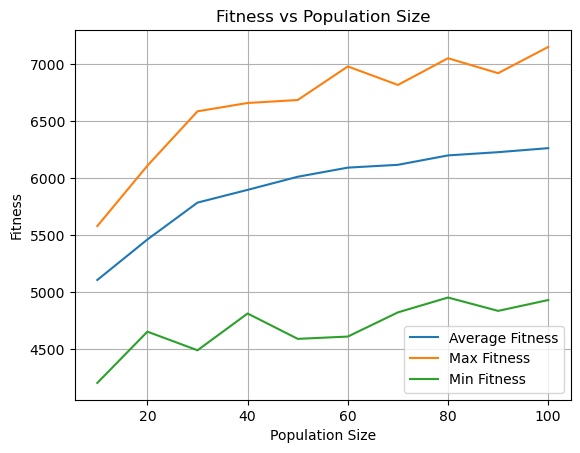

In [10]:
import statistics
import matplotlib.pyplot as plt

population_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # List of population sizes

best_fitness_stats = []  # List to store best fitness statistics for each population size

for population_size in population_sizes:
    # Store the best fitness value and corresponding generation
    best_fitness_values = []
    best_generation_values = []

    generation = 0  # Initialize generation counter

    for i in range(num_generations):
        generation += 1  # Increment generation counter

        # Appel de l'algorithme génétique
        best_path, best_fitness = genetic_algorithm(graph, population_size, generation, tournament_size, mutation_rate, num_trucks)

        # Split the best path into separate paths for each truck
        truck_paths = [best_path[i*(len(best_path)//num_trucks):(i+1)*(len(best_path)//num_trucks)+1] for i in range(num_trucks)]

        # Ensure the first and last node are the same across all trucks
        for i in range(num_trucks):
            truck_paths[i][-1] = truck_paths[i][0]

        # Calculate the total cost for the current generation
        total_cost = sum([calculate_path_cost(graph, path) for path in truck_paths])

        # Store the best fitness and corresponding generation
        best_fitness_values.append(best_fitness)
        best_generation_values.append(generation)

        # Convert the total cost from minutes to hours and minutes
        total_hours = int(total_cost // 60)
        total_minutes = int(total_cost % 60)

        # Display the generation number and total time required
        print(f"Generation {generation}:")
        print(f"Total time required: {total_hours} hours {total_minutes} minutes.")
        print()

    # Calculate statistics for the population size
    avg_fitness = statistics.mean(best_fitness_values)
    max_fitness = max(best_fitness_values)
    min_fitness = min(best_fitness_values)

    # Store the population size and corresponding fitness statistics
    best_fitness_stats.append((population_size, avg_fitness, max_fitness, min_fitness))

# Extract statistics for plotting
population_sizes = [stat[0] for stat in best_fitness_stats]
avg_fitness_values = [stat[1] for stat in best_fitness_stats]
max_fitness_values = [stat[2] for stat in best_fitness_stats]
min_fitness_values = [stat[3] for stat in best_fitness_stats]

# Plotting the results
plt.plot(population_sizes, avg_fitness_values, label='Average Fitness')
plt.plot(population_sizes, max_fitness_values, label='Max Fitness')
plt.plot(population_sizes, min_fitness_values, label='Min Fitness')

plt.xlabel('Population Size')
plt.ylabel('Fitness')
plt.title('Fitness vs Population Size')

plt.legend()
plt.grid(True)
plt.show()

### Fitness Vs Mutation Rate 

Generation 1:
Total time required: 76 hours 51 minutes.

Generation 2:
Total time required: 81 hours 31 minutes.

Generation 3:
Total time required: 78 hours 2 minutes.

Generation 4:
Total time required: 79 hours 37 minutes.

Generation 5:
Total time required: 81 hours 50 minutes.

Generation 6:
Total time required: 78 hours 34 minutes.

Generation 7:
Total time required: 85 hours 38 minutes.

Generation 8:
Total time required: 73 hours 13 minutes.

Generation 9:
Total time required: 89 hours 42 minutes.

Generation 10:
Total time required: 80 hours 48 minutes.

Generation 11:
Total time required: 85 hours 36 minutes.

Generation 12:
Total time required: 89 hours 25 minutes.

Generation 13:
Total time required: 85 hours 42 minutes.

Generation 14:
Total time required: 108 hours 26 minutes.

Generation 15:
Total time required: 92 hours 43 minutes.

Generation 16:
Total time required: 78 hours 22 minutes.

Generation 17:
Total time required: 90 hours 42 minutes.

Generation 18:
Total ti

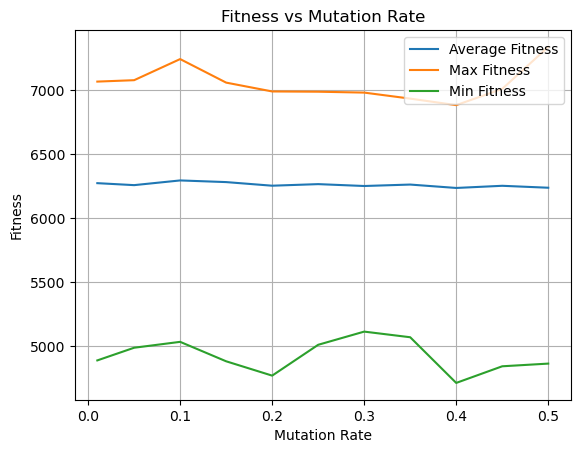

In [12]:
import statistics
import matplotlib.pyplot as plt

mutation_rates = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]  # List of mutation rates

best_fitness_stats = []  # List to store best fitness statistics for each mutation rate

for mutation_rate in mutation_rates:
    # Store the best fitness value and corresponding generation
    best_fitness_values = []
    best_generation_values = []

    generation = 0  # Initialize generation counter

    for i in range(num_generations):
        generation += 1  # Increment generation counter

        # Appel de l'algorithme génétique
        best_path, best_fitness = genetic_algorithm(graph, population_size, generation, tournament_size, mutation_rate, num_trucks)

        # Split the best path into separate paths for each truck
        truck_paths = [best_path[i*(len(best_path)//num_trucks):(i+1)*(len(best_path)//num_trucks)+1] for i in range(num_trucks)]

        # Ensure the first and last node are the same across all trucks
        for i in range(num_trucks):
            truck_paths[i][-1] = truck_paths[i][0]

        # Calculate the total cost for the current generation
        total_cost = sum([calculate_path_cost(graph, path) for path in truck_paths])

        # Store the best fitness and corresponding generation
        best_fitness_values.append(best_fitness)
        best_generation_values.append(generation)

        # Convert the total cost from minutes to hours and minutes
        total_hours = int(total_cost // 60)
        total_minutes = int(total_cost % 60)

        # Display the generation number and total time required
        print(f"Generation {generation}:")
        print(f"Total time required: {total_hours} hours {total_minutes} minutes.")
        print()

    # Calculate statistics for the mutation rate
    avg_fitness = statistics.mean(best_fitness_values)
    max_fitness = max(best_fitness_values)
    min_fitness = min(best_fitness_values)

    # Store the mutation rate and corresponding fitness statistics
    best_fitness_stats.append((mutation_rate, avg_fitness, max_fitness, min_fitness))

# Extract statistics for plotting
mutation_rates = [stat[0] for stat in best_fitness_stats]
avg_fitness_values = [stat[1] for stat in best_fitness_stats]
max_fitness_values = [stat[2] for stat in best_fitness_stats]
min_fitness_values = [stat[3] for stat in best_fitness_stats]

# Plotting the results
plt.plot(mutation_rates, avg_fitness_values, label='Average Fitness')
plt.plot(mutation_rates, max_fitness_values, label='Max Fitness')
plt.plot(mutation_rates, min_fitness_values, label='Min Fitness')

plt.xlabel('Mutation Rate')
plt.ylabel('Fitness')
plt.title('Fitness vs Mutation Rate')

plt.legend()
plt.grid(True)
plt.show()

# Conclusion
Dans le cadre de notre projet de gestion de tournées de livraison en tenant compte du trafic prévu, nous avez pris la décision de choisir l'algorithme génétique (AG) comme méthode de recherche opérationnelle. Cette décision peut être motivée par plusieurs facteurs tels que l'adaptabilité de l'AG pour gérer des problèmes complexes avec des contraintes multiples, sa capacité à explorer efficacement l'espace de recherche, ainsi que sa flexibilité pour s'adapter aux évolutions et variations du trafic.

L'utilisation de l'AG nous a permis de générer des solutions potentiellement optimales pour minimiser la durée totale des tournées de livraison en prenant en compte les contraintes spécifiques de notre projet. Nous pourrons également prendre en considération les contraintes supplémentaires mentionnées, rendant ainsi l'étude plus réaliste et attrayante pour l'ADEME.


# Bibliographie

<ul>
    <li>[1]	« VRP ». Consulté le: juin. 17, 2023. [En ligne]. Disponible sur: https://www.sciencedirect.com/science/article/pii/S2192437620300649</li>
    <li>[3]	« ACO ». Consulté le: juin. 18, 2023. [En ligne]. Disponible sur: https://tel.archives-ouvertes.fr/tel-00952774/document</li>
    <li>[4]	« Genetique ». Consulté le: juin. 18, 2023. [En ligne]. Disponible sur: https://asrjetsjournal.org/index.php/American_Scientific_Journal/article/view/6319</li>

</ul>
